# Clúster por el método K-Mean
K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos.

El problema es computacionalmente difícil (NP-hard). Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local. Estos suelen ser similares a los algoritmos expectation-maximization de mezclas de distribuciones gausianas por medio de un enfoque de refinamiento iterativo empleado por ambos algoritmos. Además, los dos algoritmos usan los centros que los grupos utilizan para modelar los datos, sin embargo k-medias tiende a encontrar grupos de extensión espacial comparable, mientras que el mecanismo expectation-maximization permite que los grupos tengan formas diferentes.

Dado un conjunto de observaciones (x1, x2, …, xn), donde cada observación es un vector real de d dimensiones, k-medias construye una partición de las observaciones en k conjuntos (k ≤ n) a fin de minimizar la suma de los cuadrados dentro de cada grupo (WCSS): S = {S1, S2, …, Sk}

${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} _{j}\in S_{i}}\left\|\mathbf {x} _{j}-{\boldsymbol {\mu }}_{i}\right\|^{2}}\underset{\mathbf{S}} {\operatorname{arg\,min}} 
\sum_{i=1}^{k} \sum_{\mathbf x_j \in S_i} \left\| \mathbf x_j - 
\boldsymbol\mu_i \right\|^2$

donde µi es la media de puntos en $S_i$.

**Algoritmo estándar**

El algoritmo más común utiliza una técnica de refinamiento iterativo. Debido a su ubicuidad a menudo se llama el algoritmo k-medias, también se le conoce como algoritmo de Lloyd, sobre todo en la comunidad informática.

Dado un conjunto inicial de k centroides m1(1),…,mk(1) (ver más abajo), el algoritmo continúa alternando entre dos pasos:7​

**Paso de asignación:** Asigna cada observación al grupo con la media más cercana (es decir, la partición de las observaciones de acuerdo con el diagrama de Voronoi generado por los centroides).

${\displaystyle S_{i}^{(t)}={\big \{}x_{p}:{\big \|}x_{p}-m_{i}^{(t)}{\big \|}\leq {\big \|}x_{p}-m_{j}^{(t)}{\big \|}\ \forall \ 1\leq j\leq k{\big \}}}S_i^{(t)} = \big \{ x_p : \big \| x_p - m^{(t)}_i \big \| 
\le \big \| x_p - m^{(t)}_j \big \| \ \forall\ 1 \le j \le k 
\big\}$

Donde cada ${\displaystyle x_{p}}x_{p}$ va exactamente dentro de un ${\displaystyle S_{i}^{(t)}}S^{(t)}_i$, incluso aunque pudiera ir en dos de ellos.

**Paso de actualización:** Calcular los nuevos centroides como el centroide de las observaciones en el grupo.

${\displaystyle \mathbf {m} _{i}^{(t+1)}={\frac {1}{|S_{i}^{(t)}|}}\sum _{\mathbf {x} _{j}\in S_{i}^{(t)}}\mathbf {x} _{j}}\mathbf m^{(t+1)}_i = \frac{1}{|S^{(t)}_i|} \sum_{\mathbf x_j \in S^{(t)}_i} \mathbf x_j$

El algoritmo se considera que ha convergido cuando las asignaciones ya no cambian.

Los métodos de inicialización de Forgy y Partición Aleatoria son comúnmente utilizados. El método Forgy elige aleatoriamente k observaciones del conjunto de datos y las utiliza como centroides iniciales. El método de partición aleatoria primero asigna aleatoriamente un clúster para cada observación y después procede a la etapa de actualización, por lo tanto calcular el clúster inicial para ser el centro de gravedad de los puntos de la agrupación asignados al azar. El método Forgy tiende a dispersar los centroides iniciales, mientras que la partición aleatoria ubica los centroides cerca del centro del conjunto de datos. Según Hamerly y compañía, el método de partición aleatoria general, es preferible para los algoritmos tales como los k-medias armonizadas y fuzzy k-medias. Para expectation maximization y el algoritmo estándar el método de Forgy es preferible.

![K-Means](kmean.png)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Módulo para generar los clusteres con la función K-Means
from sklearn.cluster import KMeans

%matplotlib inline

## Cargar los datos

In [62]:
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%205/Datasets/vinos.csv'
df = pd.read_csv(url, header=0)

In [63]:
df.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [65]:
# Eliminar el atributo vino que viene siendo una llave principal o identificador
df.drop('Vino', axis=1, inplace=True)

In [66]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Normalizar los valores del dataframe

In [68]:
# Realizar la normalización como el cociente de los valores del dataframe menos su valor
# mínimo sobre la diferencia entre los valores máximos y mínimos
df_norm = (df - df.min()) / (df.max() - df.min())

In [69]:
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [70]:
df_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Matríz de distancias euclidianas
A modo de ejemplo, se va a calcular las distancias entre las diferentes instancias de nuestro conjunto de datos, para esto se utilizará la función 'pairwise_distances' de scikitlearn. Debido a la cantidad de instancias que tenemos en el dataframe solo se visualizará la distancia entre las primeras 13 instancias, que es igual a la cantidad de atributos. Esta apartado es opcional para construir nuestros clusteres con el algoritmo K-Means pero es interesante como se calculan las distancias por el método euclidiano.

In [71]:
from sklearn.metrics import pairwise_distances

distancias = pairwise_distances(X=df_norm, metric='euclidean')

In [72]:
# La matriz de distancias es simétrica con respecto a la diagonal principal por lo que
# vamos a asignar el valor 'NaN' a las distancias que están por encima de esta
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

In [73]:
distancias = pd.DataFrame(distancias,
                          columns=df_norm.index + 1,
                          index=df_norm.index + 1)
distancias.iloc[:13, :13]

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.626832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.573318,0.720909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.592331,0.846564,0.659279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.715037,0.802419,0.572286,0.934990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.565213,0.672823,0.555933,0.414884,0.773320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.443158,0.507863,0.552595,0.638962,0.769170,0.495551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.456059,0.575290,0.641844,0.673918,0.622035,0.535687,0.414272,NaN,NaN,NaN,NaN,NaN,NaN
9,0.569281,0.556596,0.664793,0.694229,0.794407,0.474415,0.404822,0.617932,NaN,NaN,NaN,NaN,NaN
10,0.441912,0.473779,0.551489,0.545730,0.762785,0.515571,0.416491,0.545930,0.452776,NaN,NaN,NaN,NaN


## Determinar la cantidad óptima de clusters

### Método Elbow (Codo de Jambú)
El método Elbow, también conocido como método del codo, sigue una estrategia comúnmente empleada para encontrar el valor óptimo de un hiperparámetro. La idea es probar un rango de valores del hiperparámetro en cuestión, representar gráficamente los resultados obtenidos con cada uno, e identificar aquel punto de la curva (codo) a partir del cual la mejora deja de ser notable. En los casos de partitioning clustering, como por ejemplo K-means, las observaciones se agrupan de una forma tal que se minimiza la varianza total intra-cluster. El método Elbow calcula la varianza total intra-cluster en función del número de clusters y escoge como óptimo aquel valor a partir del cual añadir más clusters apenas consigue mejoría.

In [74]:
# Se crean varios modelos de cluster para obtener el valor de la
# suma de los cuadrados en cada grupo
datos = []

for i in range(1, 15):
    kmedias = KMeans(n_clusters=i, max_iter=1000)
    kmedias.fit(df_norm)
    # Actualizar la lista datos
    datos.append(kmedias.inertia_)

print(datos)

[95.59953778471063, 64.5376670238943, 48.954035819626625, 44.769330540824775, 42.27967465399292, 39.759582294900135, 38.225044102476936, 36.311270130813575, 34.679775356882125, 33.36672251328923, 31.91245979247747, 30.7078000522445, 30.00382915440844, 28.651820756859237]


Text(0, 0.5, 'Suma de cuadrados en cada grupo (wcss)')

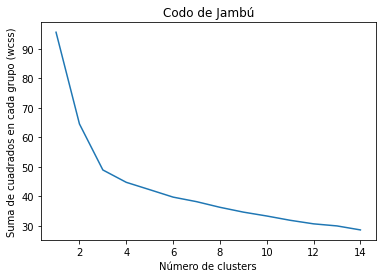

In [75]:
plt.plot(range(1, 15), datos)
plt.title('Codo de Jambú')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de cuadrados en cada grupo (wcss)')

Se observa en la gráfica que a partir de 3 clusteres comienza a estabilizarse la suma de los cuadrados en cada grupo.

### Método promedio silhouette
El método de average silhouette considera como número óptimo de clusters aquel que maximiza la media del silhouette coeficient de todas las observaciones.

El silhouette coeficient  ($s_i$)  cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

In [76]:
# Importar los módulos y funciones necesarias
from sklearn.metrics import silhouette_score

prom_silhouette = []

for i in range(2, 15):
    km_sil = KMeans(n_clusters=i, max_iter=1000, n_init=20)
    # Ajustar los datos y realizar las predicciones
    model = km_sil.fit_predict(df_norm)
    # Obtener los valores medios de silhouette
    sil_prom = silhouette_score(df_norm, model)
    # Actualizar la lista prom_silhouette
    prom_silhouette.append(sil_prom)

Text(0, 0.5, 'Media índices silhouette')

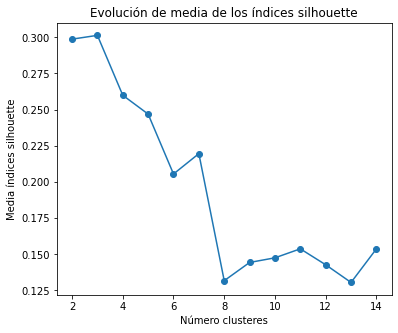

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(range(2, 15), prom_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusteres')
ax.set_ylabel('Media índices silhouette')

El valor promedio máximo de los índices de silhouette se presenta cuando hay presencia de tres clusteres, ambos métodos para escoger la cantidad de clusteres coincide por lo que se creará un modelo con este valor.

## Aplicar K-Means con los clusters determinados en el codo de Jambú

In [78]:
clusters = KMeans(n_clusters=3, max_iter=1000)
clusters.fit(df_norm)

KMeans(max_iter=1000, n_clusters=3)

In [79]:
# Agregar al dataframe una columna con los clusteres asignados
df['Cluster_KMeans'] = clusters.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_KMeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## Visualizar los clusters formados
Por limitaciones inherentes a nuestra capacidad de visualización de los datos vamos a desarrollar dos modelos equivalentes, uno en 2D y otro en 3D, haciendo uso del Análisis de Componentes Principales con el fin de reducir los atributos del dataframe a dos componentes y tres componentes, respectivamente.

In [80]:
# Importar módulos y funciones pertinentes
from sklearn.decomposition import PCA

# Generar un modelo con dos componentes
pca = PCA(n_components=2)
# Ajustar el modelo a los datos
pca_df = pca.fit_transform(df_norm)
# Crear los dataframes respectivos
pca_vinos = pd.DataFrame(data=pca_df, columns=['Comp_1', 'Comp_2'])
pca_graf = pd.concat([pca_vinos, df[['Cluster_KMeans']]], axis=1)

pca_graf

,Comp_1,Comp_2,Cluster_KMeans
0,-0.706336,-0.253193,0
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,0
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


In [81]:
# Ver la distribución de los componentes
pd.DataFrame(data=pca.components_,
             columns=df_norm.columns,
             index=['Comp_1', 'Comp_2'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Comp_1,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
Comp_2,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888


In [82]:
# Varianza explicada por cada componente
print(pca.explained_variance_ratio_)

[0.40749485 0.18970352]


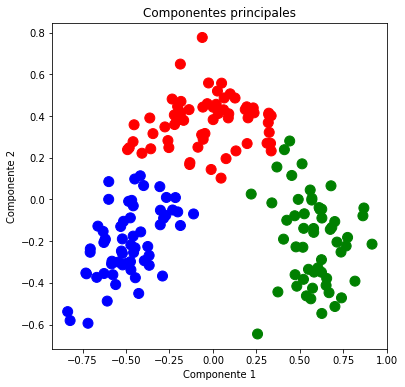

In [83]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

tema_color = np.array(['blue', 'green', 'red'])
ax.scatter(pca_graf.Comp_1,
           pca_graf.Comp_2,
           c=tema_color[pca_graf.Cluster_KMeans],
           s=100)

In [84]:
# Ahora generaremos un modelo con tres componentes
pca = PCA(n_components=3)
pca_df = pca.fit_transform(df_norm)
pca_vinos = pd.DataFrame(data=pca_df, columns=['Comp_1', 'Comp_2', 'Comp_3'])
pca_graf = pd.concat([pca_vinos, df[['Cluster_KMeans']]], axis=1)

pca_graf

,Comp_1,Comp_2,Comp_3,Cluster_KMeans
0,-0.706336,-0.253193,0.024093,0
1,-0.484977,-0.008823,-0.280482,0
2,-0.521172,-0.189187,0.196217,0
3,-0.821644,-0.580906,0.081110,0
4,-0.202546,-0.059467,0.300240,0
...,...,...,...,...
173,0.739510,-0.471901,0.209360,1
174,0.581781,-0.348366,0.083590,1
175,0.626313,-0.546857,-0.030495,1
176,0.572991,-0.425516,-0.094537,1


In [85]:
# Ver la distribución de los componentes
pd.DataFrame(data=pca.components_,
             columns=df_norm.columns,
             index=['Comp_1', 'Comp_2', 'Comp_3'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Comp_1,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
Comp_2,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
Comp_3,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968


In [86]:
# Varianza explicada por cada componente
print(pca.explained_variance_ratio_)

[0.40749485 0.18970352 0.08561671]


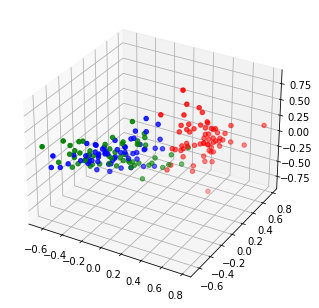

In [87]:
X = np.array(pca_graf[['Comp_1', 'Comp_2', 'Comp_3']])
y = np.array(pca_graf['Cluster_KMeans'])

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
tema_color = np.array(['blue', 'green', 'red'])
ax.scatter(X[:, 1], X[:, 1], X[:, 2], c=tema_color[pca_graf.Cluster_KMeans])

In [88]:
import plotly.express as px

In [89]:
fig = px.scatter_3d(pca_graf,
                    x='Comp_1',
                    y='Comp_2',
                    z='Comp_3',
                    color='Cluster_KMeans',
                    title='Clustering de vinos',
                    opacity=0.5)
                    #symbol=pca_graf.Cluster_KMeans
fig.show()

In [90]:
df_norm.to_csv('norm.csv', header=True, index=False)

# Otros algoritmos de clustering

## Affinity Propagation
Affinity Propagation (AP) es un algoritmo que trabaja con la matriz de similaridad, en vez de con la distancia euclídea (¿Qué es la distancia euclídea?). Esto hace que los puntos que esten cerca entre sí, tienen una alta similaridad y los más alejados tienen una baja similaridad, es decir se parecen poco.

Esto lo hace el algoritmo inicializando dos matrices distintas:

* La Matriz de Responsabilidad: es la matriz encargada de determinar como de responsable es cada punto de nuestro conjunto de datos, es decir la importancia que tiene.
* La Matriz de Disponibilidad: La matriz encargada de determinar la cantidad de puntos que tiene un punto al rededor, es decir sus vecinos.

Partiendo de estas dos matrices el algoritmo elegirá sus Exemplars que son aquellos puntos que serán el centro de los distintos clusters. Los puntos con mayor responsablidad y disponibilidad serán los elegidos.

Al contrario que otros algoritmos de clustering, a este no es necesario decirle el número de clusters que queremos como por ejemplo ocurre con K-Means o Gaussian Mixture Model.

In [91]:
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation

In [92]:
# Crear el objeto modelo
X_Aff=df_norm.copy()
model = AffinityPropagation(damping=0.9)
# Entrenar el modelo
model.fit(X_Aff)
# Asignar las clases a cada instancia
clases = model.predict(X_Aff)
# Ver los valores únicos de los cluster
clusters = unique(clases)
print('Clases predichas: ', '\n', clases, '\n\n', 'Valores únicos de clase predicha: ', '\n', clusters)

Clases predichas:  
 [ 2  1  2  0  2  0  1  2  1  2  0  1  1  0  0  1  0  0  0  2  2  2  2  2
  2  2  1  1  2  2  1  1  1  0  2  2  2  1  1  2  2  2  2  2  2  2  2  2
  1  0  1  1  0  0  2  2  2  1  0  3  3  3  6  6  5  6  6  6  3  4 11  2
  7  2  2  6  6  5  4  7  6  6  5 10  6  6  5  5  5  5  5  5  5  6  6  4
  8  6  6  6  6  6  7  7  7  5  7  5  7  7  7  7  5  5  7  5  7  7 11  7
  7  7  7  7  7  7  7  5  7  5  8  8  8  8  3 10 11 10 10 10 10 11 10 11
 11 11 11  9  9  9  8  8  8  9  9  9  9 10  9  9  9 10 10 11  9  9  9  9
  9  9 11  9  9  9  9  9  9  9] 

 Valores únicos de clase predicha:  
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


d:\jasdata\python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



In [93]:
X_Aff['Affinity'] = model.predict(X_Aff)
X_Aff

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Affinity
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,9
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,9
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,9
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,9


In [94]:
X_Aff1 = X_Aff.loc[:, X_Aff.columns!= 'Affinity']
X_Aff1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [95]:
# Generar un modelo con dos componentes
pca1 = PCA(n_components=2)
# Ajustar el modelo a los datos
pca_df1 = pca1.fit_transform(X_Aff1)
# Crear los dataframes respectivos
pca_vinos1 = pd.DataFrame(data=pca_df1, columns=['Comp_1', 'Comp_2'])
pca_graf1 = pd.concat([pca_vinos1, X_Aff[['Affinity']]], axis=1)

pca_graf1

,Comp_1,Comp_2,Affinity
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,9
174,0.581781,-0.348366,9
175,0.626313,-0.546857,9
176,0.572991,-0.425516,9


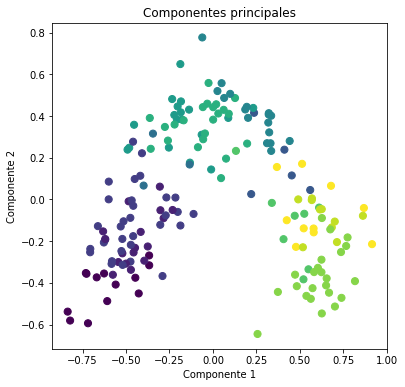

In [96]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

#tema_color = np.array(['blue', 'green', 'red'])
ax.scatter(pca_graf1.Comp_1,
           pca_graf1.Comp_2,
           c=pca_graf1.Affinity,
           s=50)

## BIRCH
BIRCH implementa el agrupamiento basado en el árbol de características CF Tree. Para usar BIRCH para agrupar, la clave es tratar con los parámetros estructurales del árbol CF.

En CF Tree, varios parámetros clave son el número máximo de CF B de nodos internos, el número máximo de CF L de nodos hoja y el umbral máximo de radio de muestra T de cada CF de nodos hoja. Estos tres parámetros están determinados, la estructura del árbol CF está determinada básicamente y el efecto de agrupamiento final está determinado básicamente. Se puede decir que el ajuste de BIRCH es depurar B, L y T.

En cuanto al número de categorías K, es opcional en este momento. Si no ingresa K, BIRCH determinará el valor K de la categoría para la muestra de cada nodo de hoja CF en el árbol CF. Si ingresa el valor K, BIRCH ingresará el árbol CF. Los nodos hoja CF se fusionan hasta que el número de categorías es K.

In [97]:
from sklearn.cluster import Birch

In [98]:
# Crear el objeto modelo
X_Birch = df_norm.copy()
model = Birch(threshold=0.01, n_clusters=3)
# Entrenar el modelo
model.fit(X_Birch)
# Asignar las clases a cada instancia
clases = model.predict(X_Birch)
# Ver los valores únicos de los cluster
clusters = unique(clases)
print('Clases predichas: ', '\n', clases, '\n\n',
      'Valores únicos de clase predicha: ', '\n', clusters)

Clases predichas:  
 [2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

 Valores únicos de clase predicha:  
 [0 1 2]


In [99]:
X_Birch['BIRCH'] = model.predict(X_Birch)
X_Birch1 = X_Birch.loc[:, X_Birch.columns != 'BIRCH']
X_Birch1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [100]:
# Generar un modelo con dos componentes
pca2 = PCA(n_components=2)
# Ajustar el modelo a los datos
pca_df2 = pca2.fit_transform(X_Birch1)
# Crear los dataframes respectivos
pca_vinos2 = pd.DataFrame(data=pca_df2, columns=['Comp_1', 'Comp_2'])
pca_graf2 = pd.concat([pca_vinos2, X_Birch[['BIRCH']]], axis=1)

pca_graf2

,Comp_1,Comp_2,BIRCH
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,0
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


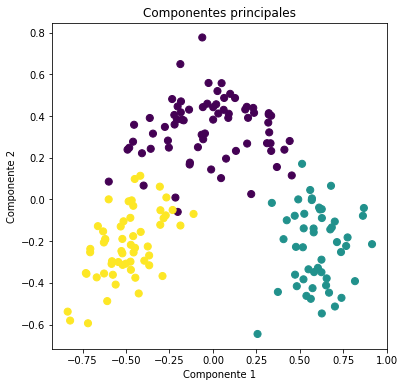

In [101]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

#tema_color = np.array(['blue', 'green', 'red'])
ax.scatter(pca_graf2.Comp_1,
           pca_graf2.Comp_2,
           c=pca_graf2.BIRCH,
           s=50)

## DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es uno de los algoritmos de clustering más avanzados, esta basado en densidad, esto significa que no usan las distancias entre puntos a la hora de realizar los clusters como por ejemplo pasa con K-Means. Esto provocará que nuestros resultados puedan ser bastante distintos si aplicamos un algoritmo de clustering basado en distancia o en densidad.

En DBSCAN no es correcto hablar de “centroides” como sucedía en el K-Means, el punto de referencia de cada cluster es llamado “Núcleo”, esto es así porque tecnicamente no tiene porque estar en el centro. Por lo tanto en DBSCAN podemos encontrar tres tipos de puntos:

* **Núcleos:** son los que satisfacen el número de puntos alrededor que nosotros fijemos con min_samples y el radio que nosotros definamos que es el épsilon.
* **Alcanzables:** son aquellos que no tienen un núcleo, pero que se encuentran dentro del “radio” del núcleo.
* **Ruido:** aquellos que no pertenecen a ningún cluster

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
X_DBS=df_norm.copy()
model = DBSCAN(eps=0.41, min_samples=9)
# Entrenar el modelo
#model.fit_predict(X_DBS)
# Asignar las clases a cada instancia
clases = model.fit_predict(X_DBS)
# Ver los valores únicos de los cluster
clusters = unique(clases)
print('Clases predichas: ', '\n', clases, '\n\n', 'Valores únicos de clase predicha: ', '\n', clusters)

Clases predichas:  
 [ 0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1  1  2  2 -1  1 -1  1 -1  2 -1 -1  2 -1 -1  2 -1  2  2 -1 -1
  2 -1 -1 -1 -1  2  2 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3 -1  3  3 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1  3 -1 -1  3  3  3  3  3
  3 -1 -1 -1  3 -1  3  3 -1 -1] 

 Valores únicos de clase predicha:  
 [-1  0  1  2  3]


In [104]:
X_DBS['DBSCAN'] = model.fit_predict(X_DBS)
X_DBS1 = X_DBS.loc[:, X_DBS.columns!= 'DBSCAN']
X_DBS1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [105]:
# Generar un modelo con dos componentes
pca3 = PCA(n_components=2)
# Ajustar el modelo a los datos
pca_df3 = pca3.fit_transform(X_DBS1)
# Crear los dataframes respectivos
pca_vinos3 = pd.DataFrame(data=pca_df3, columns=['Comp_1', 'Comp_2'])
pca_graf3 = pd.concat([pca_vinos3, X_DBS[['DBSCAN']]], axis=1)

pca_graf3

,Comp_1,Comp_2,DBSCAN
0,-0.706336,-0.253193,0
1,-0.484977,-0.008823,-1
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,-1
...,...,...,...
173,0.739510,-0.471901,-1
174,0.581781,-0.348366,3
175,0.626313,-0.546857,3
176,0.572991,-0.425516,-1


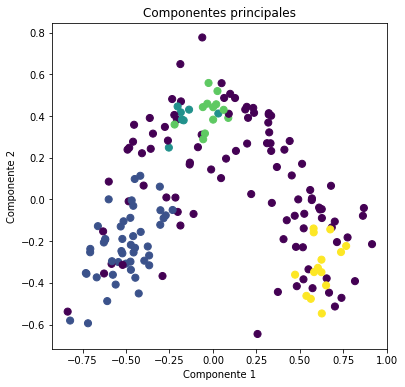

In [106]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

ax.scatter(pca_graf3.Comp_1,
           pca_graf3.Comp_2,
           c=pca_graf3.DBSCAN,
           s=50)

## Minibatch K-Mean
El algoritmo Mini Batch K-Means es una variante del algoritmo K-Means, que utiliza un pequeño lote de subconjuntos de datos para reducir el tiempo de cálculo. El llamado mini-lote aquí se refiere al subconjunto de datos seleccionados al azar cada vez que se entrena el algoritmo. El uso de estos subconjuntos generados aleatoriamente para entrenar el algoritmo reduce en gran medida el tiempo de cálculo, y el resultado generalmente es solo un poco peor que el algoritmo estándar.

Los pasos iterativos de este algoritmo tienen dos pasos:

1. Extraiga aleatoriamente algunos datos del conjunto de datos para formar un pequeño lote y asígnelos al centroide más cercano
2. Actualizar centroide

En comparación con el algoritmo K-means, los datos se actualizan en cada pequeño conjunto de muestras. Mini Batch K-Means tiene una velocidad de convergencia más rápida que K-Means, pero también reduce el efecto del agrupamiento, pero no es obvio en proyectos reales.

In [107]:
from sklearn.cluster import MiniBatchKMeans

In [108]:
X_MKM=df_norm.copy()
model = MiniBatchKMeans(n_clusters=3)
# Entrenar el modelo
model.fit(X_MKM)
# Asignar las clases a cada instancia
clases = model.predict(X_MKM)
# Ver los valores únicos de los cluster
clusters = unique(clases)
print('Clases predichas: ', '\n', clases, '\n\n', 'Valores únicos de clase predicha: ', '\n', clusters)

Clases predichas:  
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 0 2 0 1 0 1 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

 Valores únicos de clase predicha:  
 [0 1 2]


In [112]:
X_MKM['MKM'] = model.fit_predict(X_MKM)
X_MKM1 = X_MKM.loc[:, X_MKM.columns!= 'MKM']
X_MKM1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [113]:
# Generar un modelo con dos componentes
pca4 = PCA(n_components=2)
# Ajustar el modelo a los datos
pca_df4 = pca4.fit_transform(X_MKM1)
# Crear los dataframes respectivos
pca_vinos4 = pd.DataFrame(data=pca_df4, columns=['Comp_1', 'Comp_2'])
pca_graf4 = pd.concat([pca_vinos4, X_MKM[['MKM']]], axis=1)

pca_graf4

,Comp_1,Comp_2,MKM
0,-0.706336,-0.253193,0
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,0
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


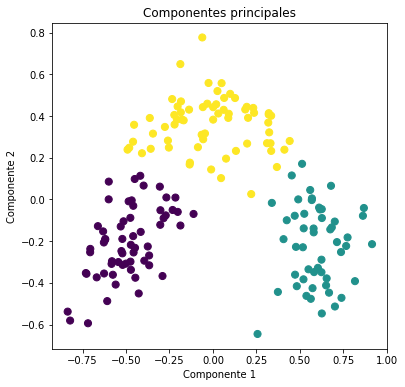

In [114]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

ax.scatter(pca_graf4.Comp_1,
           pca_graf4.Comp_2,
           c=pca_graf4.MKM,
           s=50)

## Gaussian Mixtures
Gaussian Mixture Model (GMM) es un modelo probabilístico en el que se considera que las observaciones siguen una distribución probabilística formada por la combinación de múltiples distribuciones normales (componentes). Puede entenderse como una generalización de K-means con la que, en lugar de asignar cada observación a un único cluster, se obtiene una distribución probabilidad de pertenencia a cada uno.

Ajustar un modelo GMM consiste en estimar los parámetros que definen la función de distribución de cada componente: la media y la matriz de covarianza. Por ejemplo, si el modelo tiene dos componentes, hay que encontrar la media y la matriz de covarianzas de cada una. Si es un problema multidimensional, por ejemplo de 3 variables, la media de cada componente es un vector de 3 valores y la matriz de covarianza una matriz de 3x3. El algoritmo más empleado para realizar el ajuste es Expectation-Maximization (EM).

Una vez aprendidos los parámetros, se puede calcular la densidad de probabilidad que tiene cada observación de pertenecer a cada componente y al conjunto de la distribución. Observaciones con muy poca densidad de probabilidad pueden considerarse como anomalías.

In [115]:
from sklearn.mixture import GaussianMixture

In [116]:
X_GM=df_norm.copy()
model = GaussianMixture(n_components=3)
# Entrenar el modelo
model.fit(X_GM)
# Asignar las clases a cada instancia
clases = model.predict(X_GM)
# Ver los valores únicos de los cluster
clusters = unique(clases)
print('Clases predichas: ', '\n', clases, '\n\n', 'Valores únicos de clase predicha: ', '\n', clusters)

Clases predichas:  
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

 Valores únicos de clase predicha:  
 [0 1 2]


In [117]:
X_GM['Gaussian'] = model.fit_predict(X_GM)
X_GM1 = X_GM.loc[:, X_GM.columns!= 'Gaussian']
X_GM1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [118]:
# Generar un modelo con dos componentes
pca5 = PCA(n_components=2)
# Ajustar el modelo a los datos
pca_df5 = pca5.fit_transform(X_GM1)
# Crear los dataframes respectivos
pca_vinos5 = pd.DataFrame(data=pca_df5, columns=['Comp_1', 'Comp_2'])
pca_graf5 = pd.concat([pca_vinos5, X_GM[['Gaussian']]], axis=1)

pca_graf5

,Comp_1,Comp_2,Gaussian
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,2
174,0.581781,-0.348366,2
175,0.626313,-0.546857,2
176,0.572991,-0.425516,2


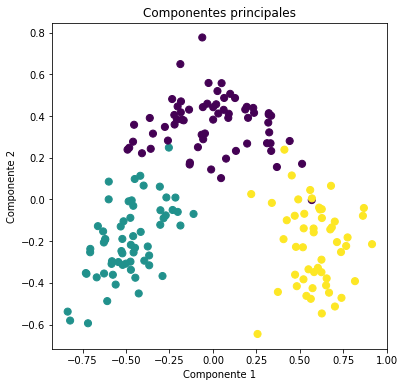

In [119]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

ax.scatter(pca_graf5.Comp_1,
           pca_graf5.Comp_2,
           c=pca_graf5.Gaussian,
           s=50)